# **PROYECTO FINAL**

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geojson

## **DATASETS**

In [2]:
df1 = pd.read_csv("listings.csv")
df1.shape

(21739, 16)

In [3]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.61,1,90
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.48,2,0
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,7,365
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.62,1,1
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,149,2020-03-12,1.22,1,332


In [4]:
df2 = pd.read_csv("listings_detailed.csv",low_memory=False)
df2.shape

(21739, 106)

In [5]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20200514190756,2020-05-16,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.61
1,21853,https://www.airbnb.com/rooms/21853,20200514190756,2020-05-16,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.48
2,23001,https://www.airbnb.com/rooms/23001,20200514190756,2020-05-15,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Apartamento de lujo, tres dormitorios dobles i...","Apartamento de tres dormitorios dobles, gran s...",none,"Barrio Arganzuela, junto a Madrid Rio, zonas c...",...,f,f,moderate,f,f,7,6,1,0,NaN
3,24836,https://www.airbnb.com/rooms/24836,20200514190756,2020-05-16,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,"Cosmopolita, lleno de locales de moda, restaur...",...,f,f,moderate,f,f,1,1,0,0,0.62
4,26825,https://www.airbnb.com/rooms/26825,20200514190756,2020-05-16,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,"Es un barrio muy tranquilo, en una zona de Mad...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.22


In [6]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21739 entries, 0 to 21738
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21739 non-null  int64  
 1   name                            21736 non-null  object 
 2   host_id                         21739 non-null  int64  
 3   host_name                       21736 non-null  object 
 4   neighbourhood_group             21739 non-null  object 
 5   neighbourhood                   21739 non-null  object 
 6   latitude                        21739 non-null  float64
 7   longitude                       21739 non-null  float64
 8   room_type                       21739 non-null  object 
 9   price                           21739 non-null  int64  
 10  minimum_nights                  21739 non-null  int64  
 11  number_of_reviews               21739 non-null  int64  
 12  last_review                     

In [8]:
for i in enumerate(df2.columns):
    print (i)

(0, 'id')
(1, 'listing_url')
(2, 'scrape_id')
(3, 'last_scraped')
(4, 'name')
(5, 'summary')
(6, 'space')
(7, 'description')
(8, 'experiences_offered')
(9, 'neighborhood_overview')
(10, 'notes')
(11, 'transit')
(12, 'access')
(13, 'interaction')
(14, 'house_rules')
(15, 'thumbnail_url')
(16, 'medium_url')
(17, 'picture_url')
(18, 'xl_picture_url')
(19, 'host_id')
(20, 'host_url')
(21, 'host_name')
(22, 'host_since')
(23, 'host_location')
(24, 'host_about')
(25, 'host_response_time')
(26, 'host_response_rate')
(27, 'host_acceptance_rate')
(28, 'host_is_superhost')
(29, 'host_thumbnail_url')
(30, 'host_picture_url')
(31, 'host_neighbourhood')
(32, 'host_listings_count')
(33, 'host_total_listings_count')
(34, 'host_verifications')
(35, 'host_has_profile_pic')
(36, 'host_identity_verified')
(37, 'street')
(38, 'neighbourhood')
(39, 'neighbourhood_cleansed')
(40, 'neighbourhood_group_cleansed')
(41, 'city')
(42, 'state')
(43, 'zipcode')
(44, 'market')
(45, 'smart_location')
(46, 'country_co

In [9]:
#Encontrar el número de datos perdidos para cada columna
datos_perdidos = df2.isnull()

for column in datos_perdidos.columns:
    print(column)
    print (datos_perdidos[column].value_counts(normalize=True)*100)
    print("")

id
False    100.0
Name: id, dtype: float64

listing_url
False    100.0
Name: listing_url, dtype: float64

scrape_id
False    100.0
Name: scrape_id, dtype: float64

last_scraped
False    100.0
Name: last_scraped, dtype: float64

name
False    99.9862
True      0.0138
Name: name, dtype: float64

summary
False    93.601362
True      6.398638
Name: summary, dtype: float64

space
False    70.389622
True     29.610378
Name: space, dtype: float64

description
False    96.140577
True      3.859423
Name: description, dtype: float64

experiences_offered
False    100.0
Name: experiences_offered, dtype: float64

neighborhood_overview
False    65.03519
True     34.96481
Name: neighborhood_overview, dtype: float64

notes
True     59.809559
False    40.190441
Name: notes, dtype: float64

transit
False    60.775565
True     39.224435
Name: transit, dtype: float64

access
True     52.159713
False    47.840287
Name: access, dtype: float64

interaction
False    58.622752
True     41.377248
Name: interact

**CREACIÓN NUEVO DATAFRAME**

In [10]:
df = df2[["id","name","summary","space","description","host_id","host_response_time","host_response_rate",
           "host_is_superhost","host_neighbourhood","host_total_listings_count","host_verifications",
           "host_identity_verified","neighbourhood","neighbourhood_cleansed","neighbourhood_group_cleansed","city",
           "country","latitude","longitude","property_type","room_type","accommodates","bathrooms","bedrooms","amenities",
          "square_feet","price",
          "weekly_price","monthly_price","minimum_nights_avg_ntm","maximum_nights_avg_ntm","calendar_updated",
           "availability_365","number_of_reviews","number_of_reviews_ltm","review_scores_rating","review_scores_accuracy",
          "review_scores_location","review_scores_value","instant_bookable","is_business_travel_ready",
           "cancellation_policy","reviews_per_month"]]

In [11]:
df.shape

(21739, 44)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21739 entries, 0 to 21738
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21739 non-null  int64  
 1   name                          21736 non-null  object 
 2   summary                       20348 non-null  object 
 3   space                         15302 non-null  object 
 4   description                   20900 non-null  object 
 5   host_id                       21739 non-null  int64  
 6   host_response_time            15460 non-null  object 
 7   host_response_rate            15460 non-null  object 
 8   host_is_superhost             21736 non-null  object 
 9   host_neighbourhood            16479 non-null  object 
 10  host_total_listings_count     21736 non-null  float64
 11  host_verifications            21739 non-null  object 
 12  host_identity_verified        21736 non-null  object 
 13  n

In [13]:
df.head()

,id,name,summary,space,description,host_id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,square_feet,price,weekly_price,monthly_price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,6369,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,13660,within a day,100%,t,Hispanoamérica,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Chamartín,Hispanoamérica,Chamartín,Madrid,Spain,40.45724,-3.67688,Apartment,Private room,2,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,1.0,365.0,3 months ago,90,75,11,98.0,10.0,10.0,10.0,f,f,flexible,0.61
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,83531,within an hour,100%,f,Aluche,2.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,Aluche,Cármenes,Latina,Madrid,Spain,40.40341,-3.74084,Apartment,Private room,1,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",97.0,$30.00,$98.00,$370.00,4.0,40.0,16 months ago,0,33,0,92.0,9.0,8.0,9.0,f,f,strict_14_with_grace_period,0.48
2,23001,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Apartamento de lujo, tres dormitorios dobles i...","Apartamento de tres dormitorios dobles, gran s...",82175,within a few hours,90%,f,Erzsébetváros - District VII.,10.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Legazpi,Legazpi,Arganzuela,Madrid,Spain,40.38695,-3.69304,Apartment,Entire home/apt,6,2.0,3.0,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",1184.0,$50.00,$556.00,"$1,500.00",15.0,730.0,5 weeks ago,365,0,0,NaN,NaN,NaN,NaN,f,f,moderate,NaN
3,24836,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",101653,within an hour,100%,t,Justicia,1.0,"['email', 'phone', 'facebook', 'reviews']",f,Justicia,Justicia,Centro,Madrid,Spain,40.41995,-3.69764,Apartment,Entire home/apt,4,1.5,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,3.0,10.0,3 months ago,1,68,9,98.0,10.0,10.0,10.0,f,f,moderate,0.62
4,26825,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,114340,within a few hours,100%,f,Legazpi,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Legazpi,Legazpi,Arganzuela,Madrid,Spain,40.38985,-3.69011,House,Private room,1,1.0,1.0,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",NaN,$25.00,NaN,NaN,2.0,365.0,2 months ago,332,149,18,94.0,10.0,9.0,9.0,f,f,strict_14_with_grace_period,1.22


**Quitamos columnas "square_feet","weekly_price" y "monthly_price" al tener una gran cantidad de valores nulos.**

In [14]:
df.drop(["square_feet","weekly_price","monthly_price"], axis= 1, inplace = True)

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df.shape

(21739, 41)

**Quitamos aquellas filas que tengan al menos 28 valores no nulos (un 70% de las columnas)**

In [16]:
df.dropna(thresh=28, inplace = True)

<ipython-input-16-76014ae045ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(thresh=28, inplace = True)


In [17]:
df.shape

(21739, 41)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21739 entries, 0 to 21738
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21739 non-null  int64  
 1   name                          21736 non-null  object 
 2   summary                       20348 non-null  object 
 3   space                         15302 non-null  object 
 4   description                   20900 non-null  object 
 5   host_id                       21739 non-null  int64  
 6   host_response_time            15460 non-null  object 
 7   host_response_rate            15460 non-null  object 
 8   host_is_superhost             21736 non-null  object 
 9   host_neighbourhood            16479 non-null  object 
 10  host_total_listings_count     21736 non-null  float64
 11  host_verifications            21739 non-null  object 
 12  host_identity_verified        21736 non-null  object 
 13  n

In [19]:
df_corr = df.drop(["id","host_id"],axis=1).corr()
df_corr

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
host_total_listings_count,1.000000,-0.004391,-0.029577,0.167546,0.071020,0.085040,-0.014771,-0.001358,0.089408,-0.054619,-0.049284,-0.141656,-0.116280,-0.046790,-0.112848,-0.084152
latitude,-0.004391,1.000000,0.244320,-0.004807,0.040164,0.023859,0.004121,-0.002422,0.016941,-0.053094,-0.048584,0.039281,0.023320,0.055470,0.031789,-0.036598
longitude,-0.029577,0.244320,1.000000,-0.059089,-0.016633,-0.009046,-0.017801,-0.001469,0.007862,-0.050107,-0.025326,0.040462,0.037476,-0.073544,0.031582,0.014729
accommodates,0.167546,-0.004807,-0.059089,1.000000,0.380359,0.685371,-0.021989,-0.004744,0.103199,0.099199,0.122732,-0.036718,-0.038046,0.053847,-0.037166,0.099620
bathrooms,0.071020,0.040164,-0.016633,0.380359,1.000000,0.460279,0.006322,-0.003459,0.066820,-0.037311,-0.026668,0.018490,0.004086,0.030696,0.029499,-0.042828
bedrooms,0.085040,0.023859,-0.009046,0.685371,0.460279,1.000000,0.013380,-0.011449,0.058884,0.004616,0.018389,0.027467,0.005737,0.008683,0.025429,0.004027
minimum_nights_avg_ntm,-0.014771,0.004121,-0.017801,-0.021989,0.006322,0.013380,1.000000,-0.001239,0.059831,-0.028894,-0.061640,0.000106,0.004434,0.005010,-0.001506,-0.046928
maximum_nights_avg_ntm,-0.001358,-0.002422,-0.001469,-0.004744,-0.003459,-0.011449,-0.001239,1.000000,0.008847,0.006667,-0.004797,-0.001731,-0.003967,0.003972,-0.001393,-0.000388
availability_365,0.089408,0.016941,0.007862,0.103199,0.066820,0.058884,0.059831,0.008847,1.000000,0.055195,0.053289,-0.058357,-0.049997,-0.012115,-0.061986,0.049790
number_of_reviews,-0.054619,-0.053094,-0.050107,0.099199,-0.037311,0.004616,-0.028894,0.006667,0.055195,1.000000,0.770318,0.075716,0.085953,0.142576,0.068853,0.770265


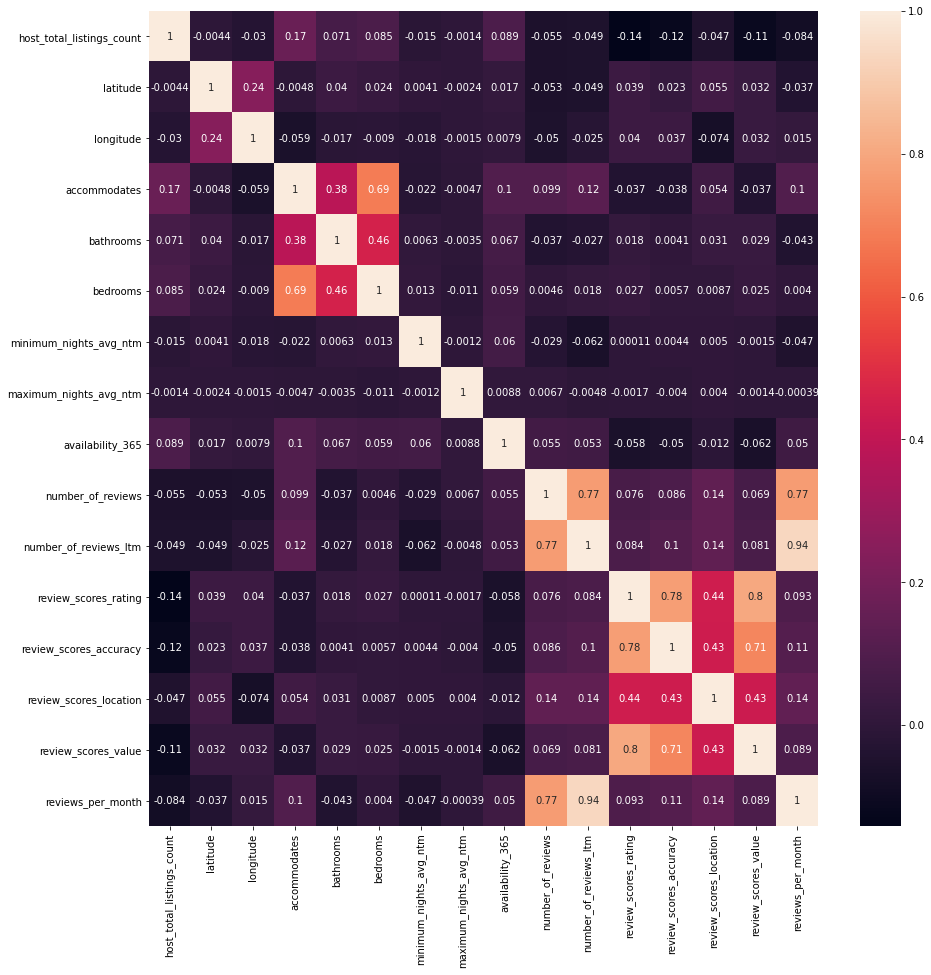

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True);

**Quitamos aquellos id que no hayan tenido reviews en los últimos 12 meses**

In [21]:
df = df[~(df["number_of_reviews_ltm"]==0)]

In [22]:
df.shape

(14299, 41)

**Quitamos las columnas "review_scores_accuracy","review_scores_location" y "review_scores_value" dada la alta correlación con "review_scores_rating"**

In [23]:
df.drop(["review_scores_accuracy","review_scores_location","review_scores_value"],axis=1, inplace=True)

In [24]:
df.shape

(14299, 38)

**Quitar símbolo del $ de la columna "price"**

In [25]:
s = df.price
df.price = s.str.replace(",",'')
df.price = s.str.strip("$")
df.price = df.price.astype(float)

In [26]:
df_corr = df.drop(["id","host_id"],axis=1).corr()
df_corr

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
host_total_listings_count,1.000000,-0.005470,-0.021998,0.171125,0.084364,0.101033,0.143150,-0.015967,-0.061578,0.062632,-0.074454,-0.077673,-0.149033,-0.101649
latitude,-0.005470,1.000000,0.250679,-0.013576,0.033714,0.002685,0.026290,-0.007484,0.011774,0.020535,-0.046553,-0.037786,0.039176,-0.038241
longitude,-0.021998,0.250679,1.000000,-0.073605,-0.010877,-0.014881,-0.003170,-0.019801,-0.015603,-0.006588,-0.041426,0.001005,0.045545,0.010394
accommodates,0.171125,-0.013576,-0.073605,1.000000,0.408154,0.714645,0.078726,-0.017912,0.017729,0.075890,0.070238,0.085982,-0.030515,0.076344
bathrooms,0.084364,0.033714,-0.010877,0.408154,1.000000,0.475955,0.080006,0.008208,0.009788,0.056774,-0.055681,-0.049873,0.026277,-0.058660
bedrooms,0.101033,0.002685,-0.014881,0.714645,0.475955,1.000000,0.082155,-0.000874,0.005944,0.045176,-0.007440,0.002428,0.032290,-0.012055
price,0.143150,0.026290,-0.003170,0.078726,0.080006,0.082155,1.000000,-0.011220,-0.029494,0.068651,-0.066681,-0.073028,-0.005909,-0.086367
minimum_nights_avg_ntm,-0.015967,-0.007484,-0.019801,-0.017912,0.008208,-0.000874,-0.011220,1.000000,0.008231,0.021693,-0.019982,-0.044965,0.003103,-0.045412
maximum_nights_avg_ntm,-0.061578,0.011774,-0.015603,0.017729,0.009788,0.005944,-0.029494,0.008231,1.000000,0.029383,0.024439,0.009972,-0.001294,0.012175
availability_365,0.062632,0.020535,-0.006588,0.075890,0.056774,0.045176,0.068651,0.021693,0.029383,1.000000,0.038216,0.006940,-0.060701,-0.015299


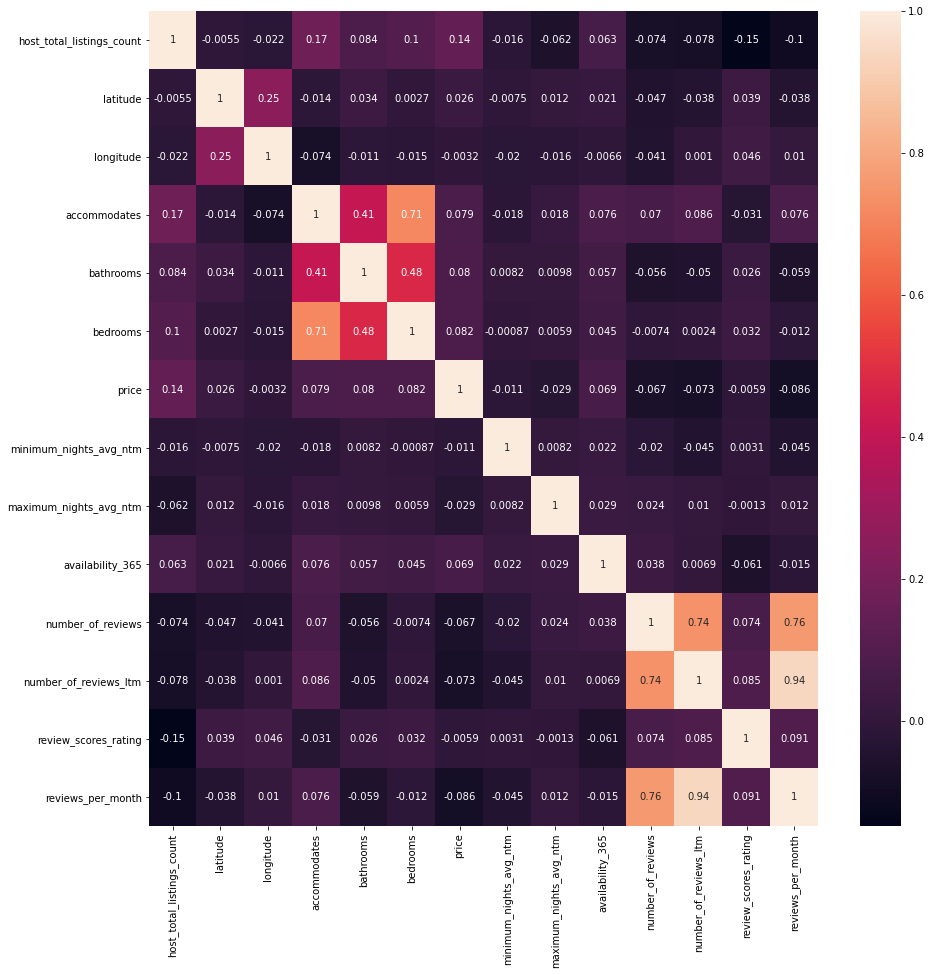

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True);

Vemos que la variable "price" no está altamente corralacionada con otras variables

**Graficamos el precio por distrito**

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


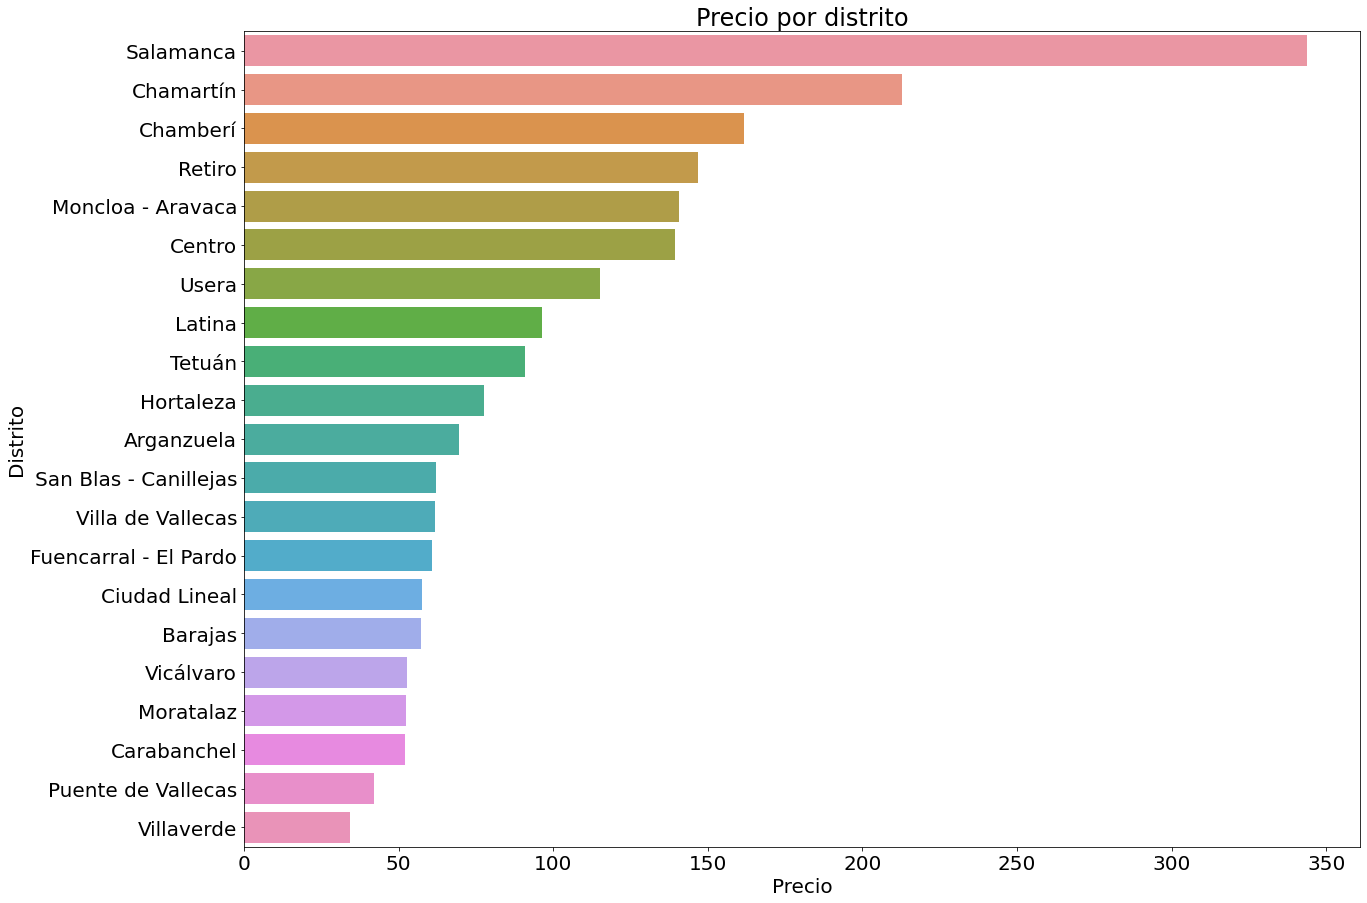

In [28]:
df_d=df.groupby(by='neighbourhood_group_cleansed').mean()['price'].sort_values(ascending=False).reset_index()
plt.rcParams['font.size']=20
fig, ax = plt.subplots(figsize=(20,15))
chart=sns.barplot(df_d['price'],df_d['neighbourhood_group_cleansed'])
plt.xlabel("Precio")
plt.ylabel("Distrito")
plt.title("Precio por distrito")
plt.show()

**Precio medio según tipo de habitación por distrito**

In [29]:
df_r = pd.pivot_table(df,values = "price",index=['neighbourhood_group_cleansed'],
                       columns=['room_type'], aggfunc=np.mean)
df_r

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Arganzuela,81.640919,53.000000,50.963696,35.714286
Barajas,95.875000,NaN,40.295775,24.000000
Carabanchel,77.977901,66.000000,32.170940,50.000000
Centro,157.627015,225.282353,64.918654,116.991071
Chamartín,306.809524,130.000000,46.649123,26.500000
Chamberí,212.341719,507.000000,53.971311,27.500000
Ciudad Lineal,84.124260,28.000000,37.353909,141.000000
Fuencarral - El Pardo,86.578125,NaN,44.830000,15.000000
Hortaleza,91.918699,65.000000,64.818182,NaN


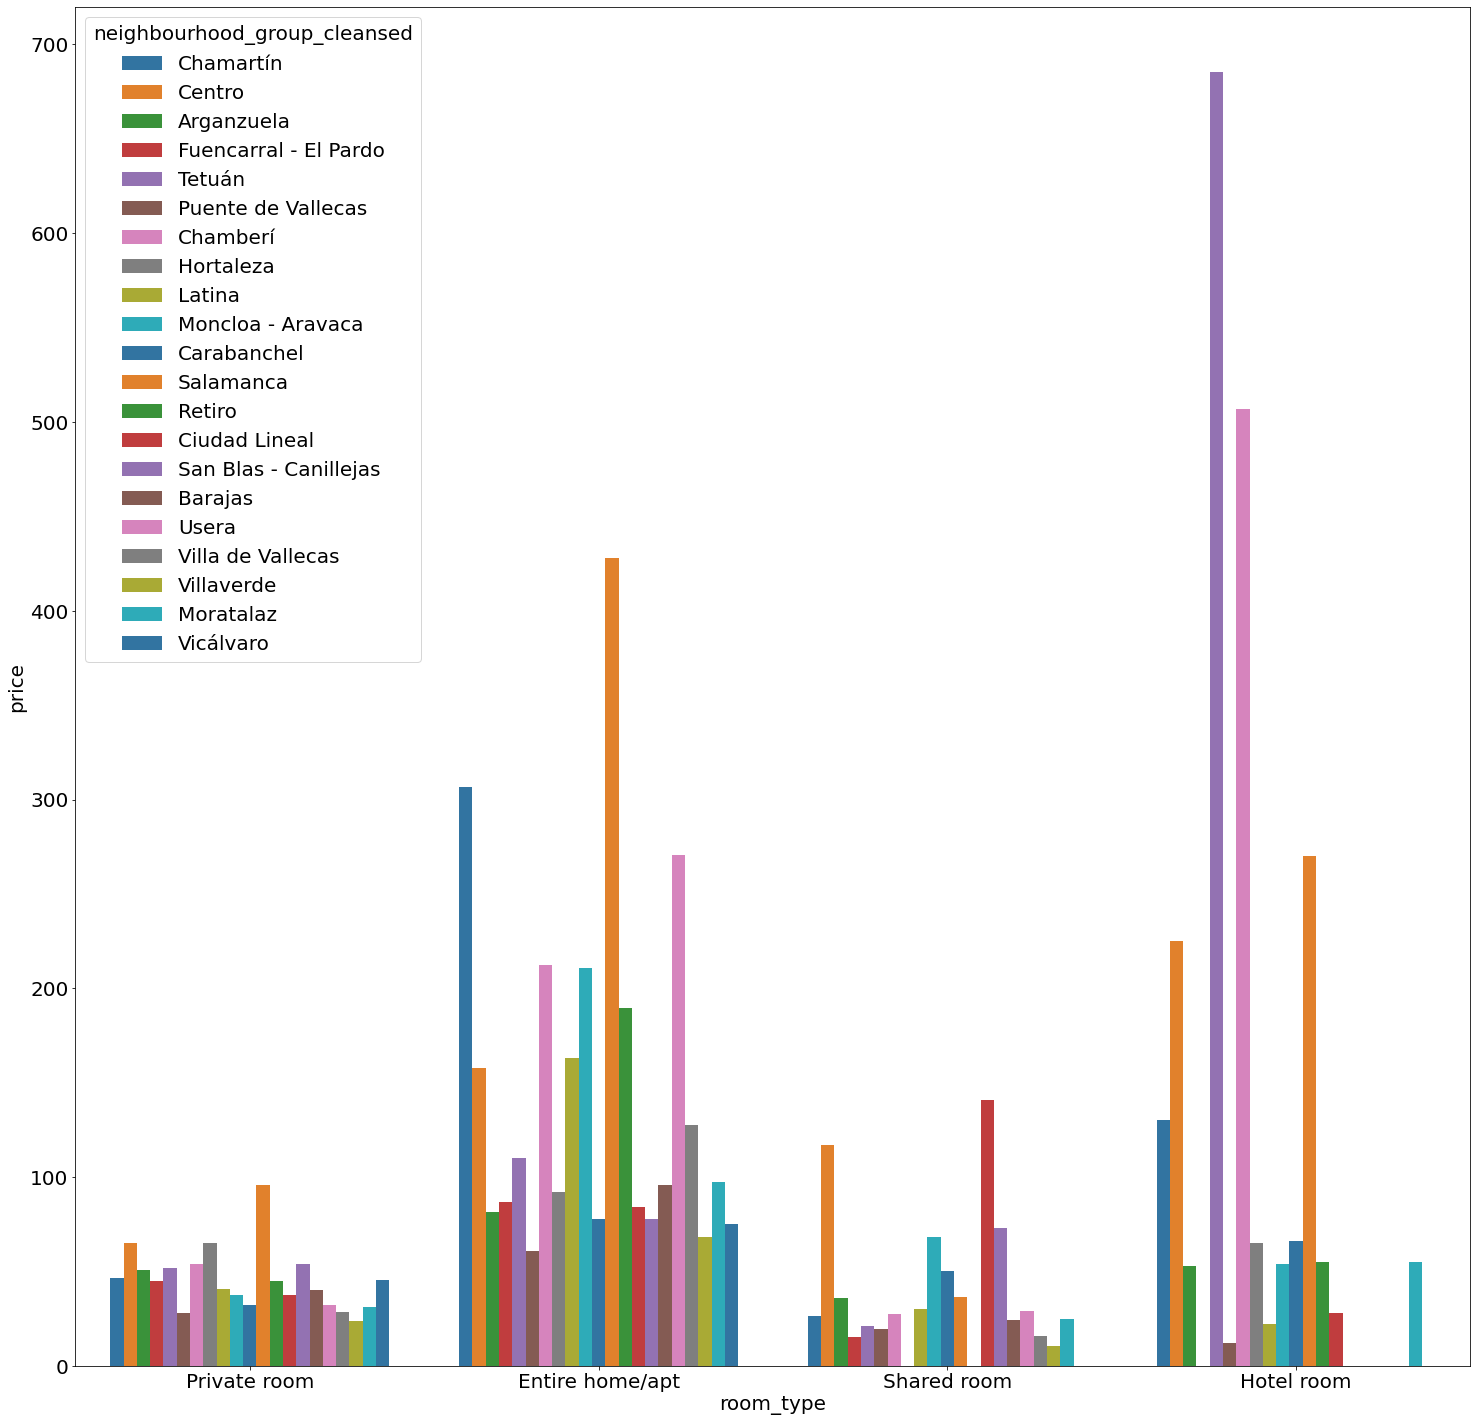

In [30]:
plt.figure(figsize=(25,25))
sns.barplot(data=df,ci=None,x='room_type',y='price',hue='neighbourhood_group_cleansed',palette=sns.color_palette());

**Outliers**

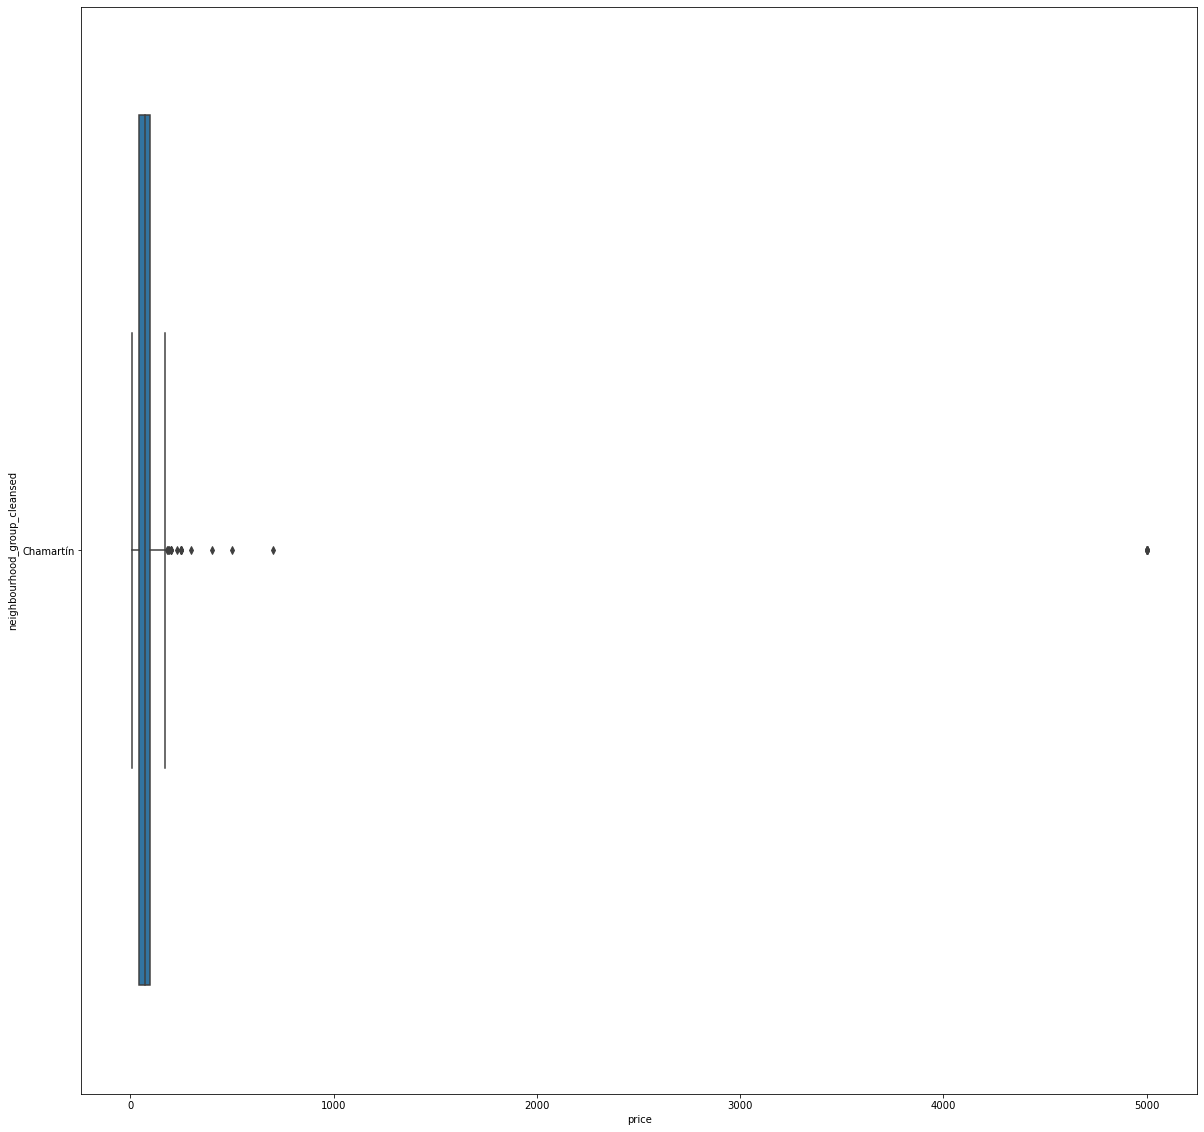

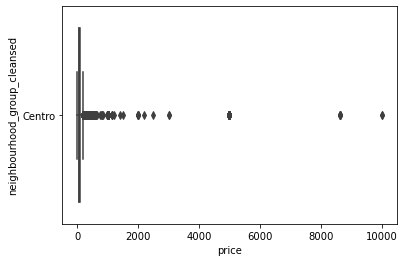

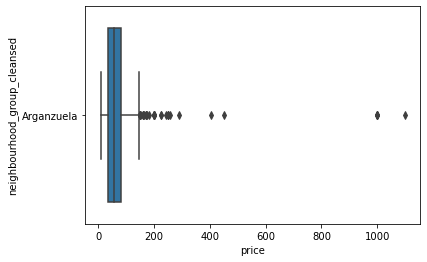

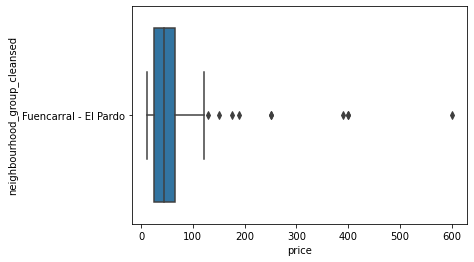

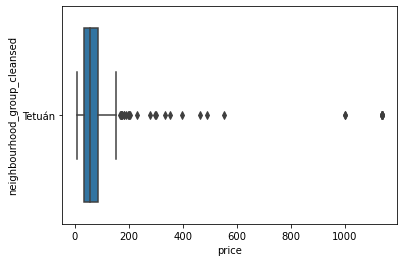

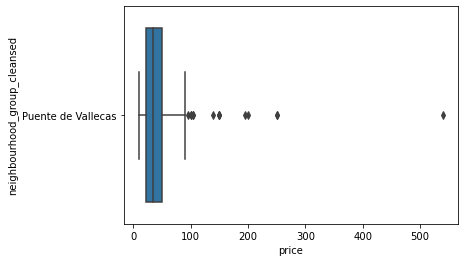

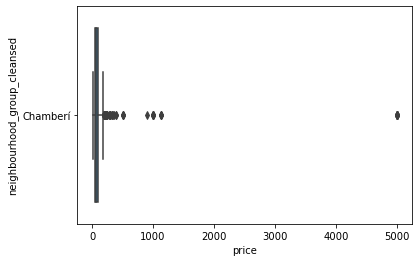

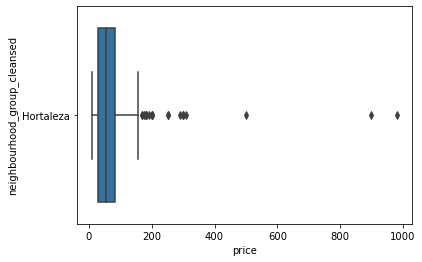

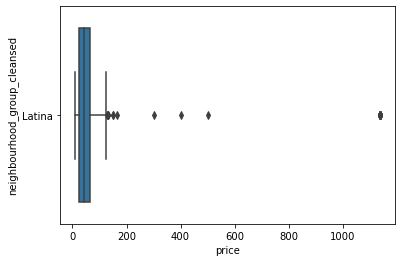

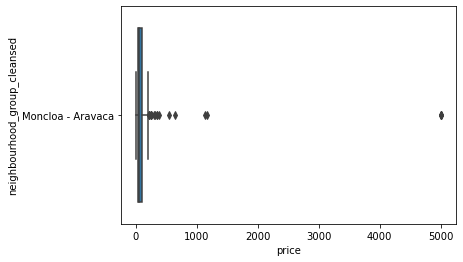

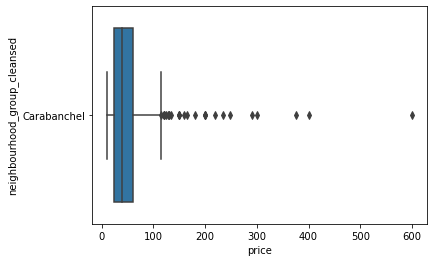

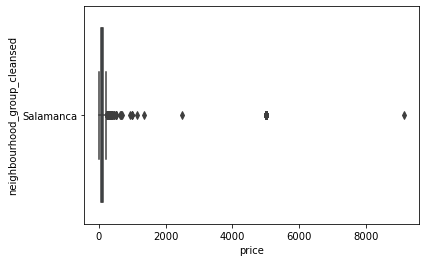

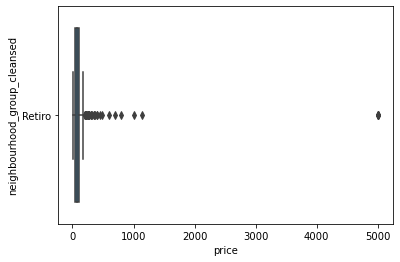

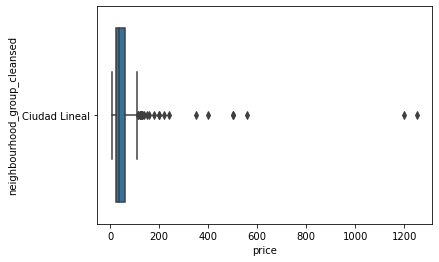

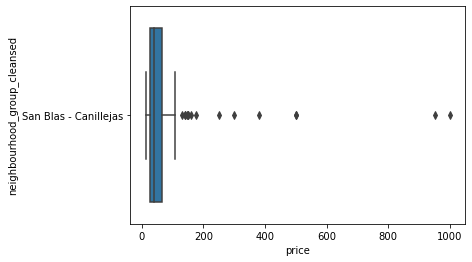

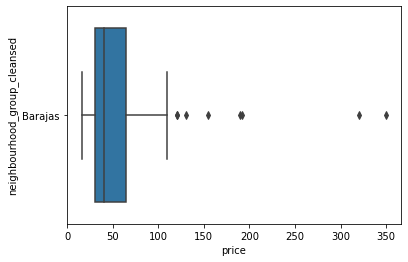

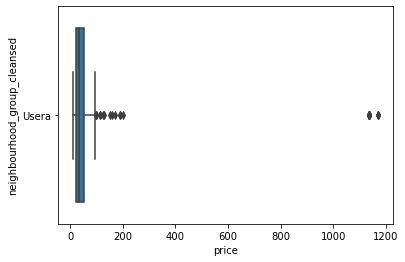

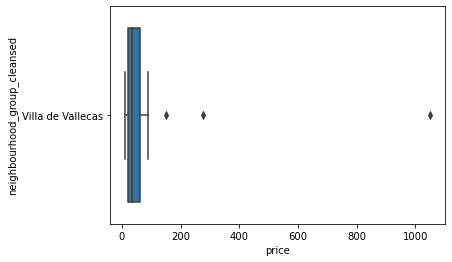

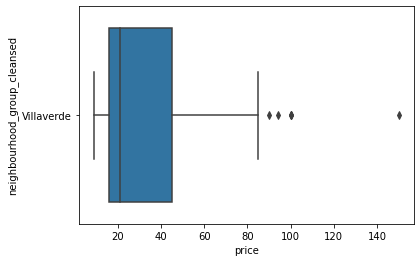

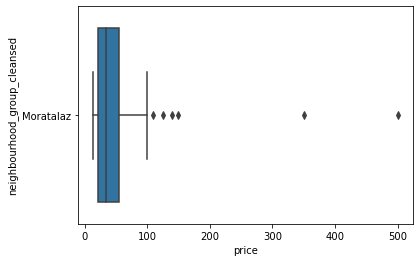

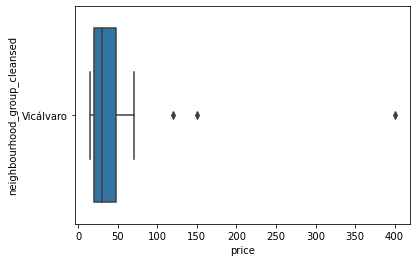

In [31]:
plt.rcParams['font.size']=10
fig, ax = plt.subplots(figsize=(20,20))
for i in df.neighbourhood_group_cleansed.unique():
    df2=df[df["neighbourhood_group_cleansed"]==i]
    sns.boxplot(x='price', y='neighbourhood_group_cleansed', data=df2)
    plt.show()

In [32]:
from scipy import stats

district=df.neighbourhood_group_cleansed.unique()
district=list(district)
room=df.room_type.unique()
room=list(room)

In [33]:
df4=pd.DataFrame()
for i in district:
    for j in room:
        df2=df[(df['neighbourhood_group_cleansed']==i ) & (df["room_type"]==j)]
        z_scores = stats.zscore(df2.price)
        z = np.abs(z_scores)
        df2['z_score']=z
        df4=df4.append(df2, ignore_index=True)

<ipython-input-33-f2b53b1f06c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z_score']=z
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2497: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, d

**Número de outliers por distrito que eliminamos al estar alejados (3 d.t.) respecto a la media del distrito**

In [34]:
df4[df4["z_score"]>3]["neighbourhood_group_cleansed"].value_counts()

Centro                   77
Salamanca                45
Latina                   18
Chamberí                 13
Tetuán                   13
Carabanchel              12
Chamartín                12
Retiro                    9
Hortaleza                 7
Arganzuela                7
Moncloa - Aravaca         7
Ciudad Lineal             6
San Blas - Canillejas     5
Puente de Vallecas        5
Fuencarral - El Pardo     4
Usera                     4
Villaverde                4
Barajas                   2
Villa de Vallecas         2
Moratalaz                 2
Vicálvaro                 1
Name: neighbourhood_group_cleansed, dtype: int64

In [35]:
df4 = df4[df4["z_score"]<3]

In [36]:
df4.shape

(14030, 39)

In [37]:
df4.head()

,id,name,summary,space,description,host_id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month,z_score
0,6369,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,13660,within a day,100%,t,Hispanoamérica,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Chamartín,Hispanoamérica,Chamartín,Madrid,Spain,40.45724,-3.67688,Apartment,Private room,2,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",70.0,1.0,365.0,3 months ago,90,75,11,98.0,f,f,flexible,0.61,0.424772
1,342557,Berlin's Park at your window. Parking included.,Very nice room in an area with excellent commu...,"Private room in a relaxing flat, ten minutes w...",Very nice room in an area with excellent commu...,1738288,within an hour,100%,f,Ciudad Jardin,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Chamartín,Ciudad Jardín,Chamartín,Madrid,Spain,40.44931,-3.67424,Apartment,Private room,1,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",70.0,2.0,120.0,9 months ago,365,55,4,97.0,f,f,strict_14_with_grace_period,0.69,0.424772
2,413240,An oasis in the city of Madrid,My house is a peaceful town house located in t...,If to be awaken every morning by the birds of ...,If to be awaken every morning by the birds of ...,2056009,within a few hours,100%,f,Hispanoamérica,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Chamartín,Hispanoamérica,Chamartín,Madrid,Spain,40.45284,-3.67059,Townhouse,Private room,2,1.0,1.0,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",48.0,2.0,15.0,6 months ago,1,109,15,98.0,f,f,moderate,1.12,0.024574
3,1395084,Room for two w/ bathroom/ Bernabéu,Renting light and spacious room (15m2/161sq ft...,Renting light and spacious room (15m2/161sq ft...,Renting light and spacious room (15m2/161sq ft...,7539510,within a few hours,100%,t,El Viso,1.0,"['email', 'phone', 'reviews']",f,El Viso,El Viso,Chamartín,Madrid,Spain,40.44104,-3.68237,Apartment,Private room,2,1.0,1.0,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,Was...",30.0,7.0,1125.0,3 months ago,322,14,3,97.0,f,f,flexible,0.23,0.302862
4,1644183,Alquiler habitación individual,Es una habitación con una cama individual de 8...,Una casa con estilo. Silenciosa y alegre. Llen...,Es una habitación con una cama individual de 8...,1766434,within an hour,100%,t,Prosperidad,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Prosperidad,Prosperidad,Chamartín,Madrid,Spain,40.44197,-3.67498,Apartment,Private room,1,1.5,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",23.0,15.0,60.0,6 months ago,364,35,4,99.0,f,f,strict_14_with_grace_period,0.66,0.430197


In [38]:
df_r = pd.pivot_table(df4,values = "price",index=['neighbourhood_group_cleansed'],
                       columns=['room_type'], aggfunc=np.mean)
df_r

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Arganzuela,78.830189,53.000000,36.885906,35.714286
Barajas,88.645161,NaN,35.871429,NaN
Carabanchel,69.034091,NaN,28.219298,35.833333
Centro,105.027511,225.282353,48.783192,30.431373
Chamartín,96.666667,NaN,38.450450,26.500000
Chamberí,109.822270,507.000000,42.195021,27.500000
Ciudad Lineal,72.692771,NaN,29.029167,141.000000
Fuencarral - El Pardo,76.629032,NaN,35.540816,NaN
Hortaleza,84.924370,65.000000,47.875969,NaN


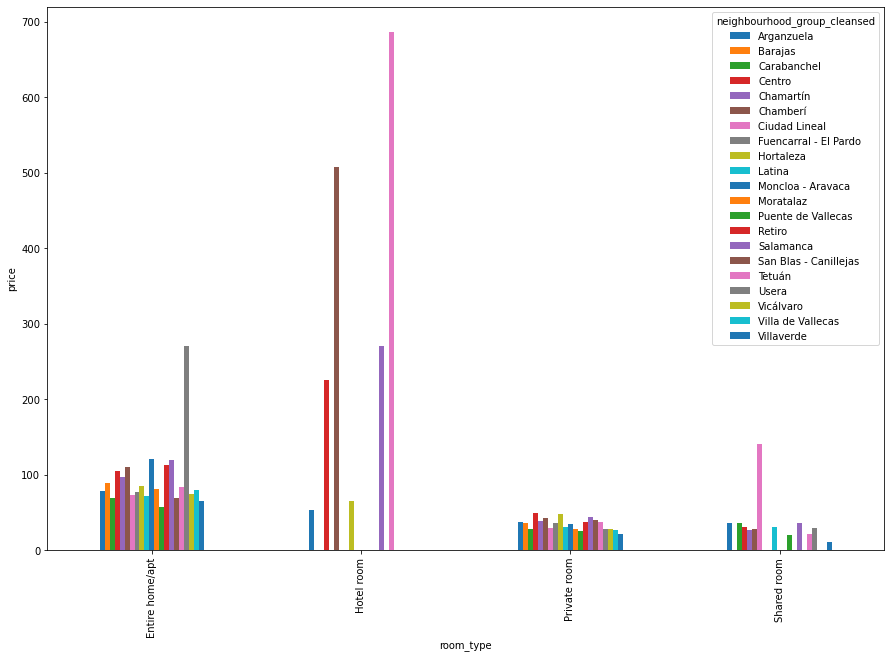

In [39]:
ax = df_r.T.plot(kind='bar',figsize=(15,10))
ylab = ax.set_ylabel('price')

In [40]:
df_m = pd.pivot_table(df4,values = "price",index=['neighbourhood_group_cleansed'],
                       columns=['bedrooms'], aggfunc=np.mean)
df_m

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
neighbourhood_group_cleansed,,,,,,,,,,
Arganzuela,54.090909,47.002049,84.664894,103.290909,146.812500,98.000000,NaN,NaN,NaN,NaN
Barajas,55.666667,40.162162,75.000000,88.875000,150.000000,192.000000,NaN,NaN,NaN,NaN
Carabanchel,40.590909,35.807971,67.613333,80.171429,45.125000,NaN,NaN,NaN,NaN,NaN
Centro,88.580032,73.249049,112.454545,170.503043,190.191489,256.562500,337.250000,315.714286,168.571429,NaN
Chamartín,59.384615,57.349282,101.421875,116.600000,235.000000,700.000000,NaN,NaN,NaN,NaN
Chamberí,80.017857,72.844037,111.420000,160.019231,178.833333,222.333333,49.000000,NaN,47.000000,NaN
Ciudad Lineal,30.555556,38.010601,70.925000,91.120000,75.000000,NaN,NaN,NaN,180.000000,NaN
Fuencarral - El Pardo,41.500000,42.317757,65.652174,101.272727,62.750000,250.000000,NaN,NaN,NaN,NaN
Hortaleza,61.066667,52.168605,96.923077,103.523810,132.800000,100.000000,NaN,NaN,NaN,NaN


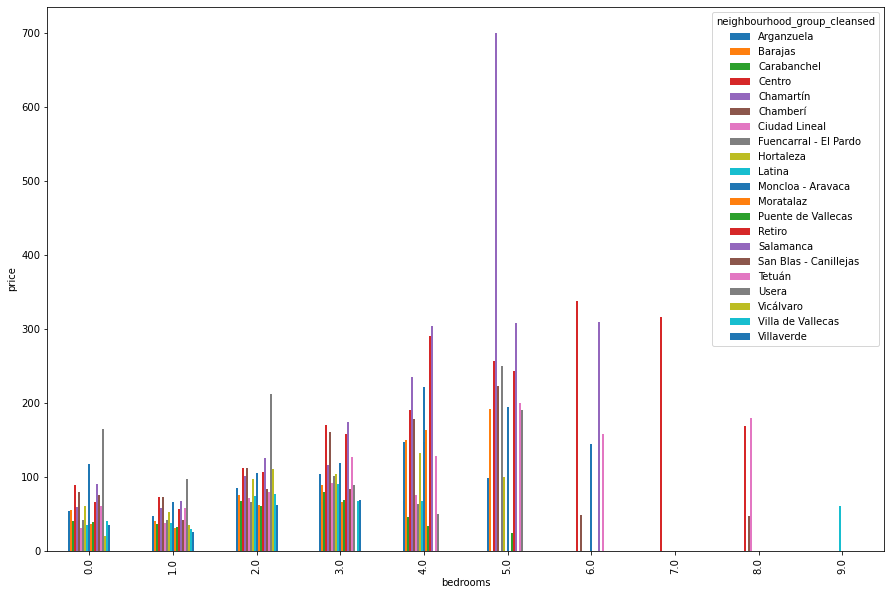

In [41]:
ax = df_m.T.plot(kind='bar',figsize=(15,10))
ylab = ax.set_ylabel('price')

**Número de habitaciones según tipología y distrito**

In [42]:
df4.groupby(['room_type',"neighbourhood_group_cleansed"]).count()["id"]

room_type        neighbourhood_group_cleansed
Entire home/apt  Arganzuela                       477
                 Barajas                           31
                 Carabanchel                      176
                 Centro                          5525
                 Chamartín                        201
                 Chamberí                         467
                 Ciudad Lineal                    166
                 Fuencarral - El Pardo             62
                 Hortaleza                        119
                 Latina                           170
                 Moncloa - Aravaca                213
                 Moratalaz                         24
                 Puente de Vallecas               172
                 Retiro                           314
                 Salamanca                        637
                 San Blas - Canillejas             82
                 Tetuán                           348
                 Usera              

# **MAPAS**

In [43]:
latitude = 40.4165001 
longitude = -3.7025599

Madrid_map = folium.Map(location=[latitude, longitude ], zoom_start=10)
Madrid_map

Airbnb = folium.map.FeatureGroup()

#los 250 items con precio de más caro a más barato
limit = 250
df5=df4.iloc[0:limit, :].sort_values("price",ascending=False)

for lat, lng, in zip(df5.latitude, df5.longitude):
    Airbnb.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, 
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )

# Agregar pop-up text a cada marcador en el mapa
latitudes = list(df5.latitude)
longitudes = list(df5.longitude)
labels = list(df5.room_type)
labels2 = list(df5.price)

for lat, lng, label,label2 in zip(latitudes, longitudes, labels,labels2):
    folium.Marker([lat, lng], popup=['Room type: '+str(label),'Price: $'+str(label2)]).add_to(Madrid_map)       
    
Madrid_map.add_child(Airbnb)
Madrid_map

**Creamos un nuevo dataframe filtrando por barrio**

In [44]:
df_map=df4.copy()

In [45]:
df_map=df_map.groupby(by='neighbourhood_cleansed').agg({'number_of_reviews':'sum','price':'mean','bathrooms':'max',
                                                        'bedrooms':'mean',
                                                        'accommodates':'mean','minimum_nights_avg_ntm':'mean',
                                                        'maximum_nights_avg_ntm':'mean','latitude':'min','longitude':'min'})\
                                                .rename(columns={'number_of_reviews':'total_reviews','price':'mean_price'
                                                                 ,'bathrooms':'max_bathrooms',
                                                                 'bedrooms':'mean_bedrooms',
                                                                 'accommodates':'mean_accommodates',
                                                                 'minimum_nights_avg_ntm':'minimun_nights_avg',
                                                                 'maximum_nights_avg_ntm':'maximum_nights_avg'})

In [46]:
df_map['neighbourhood_cleansed']=df_map.index

In [47]:
df_map

,total_reviews,mean_price,max_bathrooms,mean_bedrooms,mean_accommodates,minimun_nights_avg,maximum_nights_avg,latitude,longitude,neighbourhood_cleansed
neighbourhood_cleansed,,,,,,,,,,
Abrantes,505,41.250000,2.0,1.357143,2.750000,1.739286,769.296429,40.37481,-3.73472,Abrantes
Acacias,6521,56.348485,2.0,1.318182,3.037879,3.287879,738.781061,40.39780,-3.71347,Acacias
Adelfas,2444,59.590164,2.5,1.360656,3.508197,3.822951,863.622951,40.39673,-3.67430,Adelfas
Aeropuerto,806,34.444444,2.0,1.222222,2.444444,1.444444,1006.666667,40.45086,-3.58324,Aeropuerto
Aguilas,481,61.782609,2.0,1.304348,2.391304,2.665217,656.782609,40.37396,-3.78258,Aguilas
Alameda de Osuna,2001,46.083333,2.0,1.125000,2.208333,1.479167,576.387500,40.45076,-3.60378,Alameda de Osuna
Almagro,3558,80.800000,3.0,1.390476,3.476190,3.884762,959.570476,40.42617,-3.69937,Almagro
Almenara,2487,68.433333,4.0,1.550000,3.700000,2.568333,908.798333,40.46586,-3.69958,Almenara
Almendrales,1160,40.880000,11.0,0.900000,2.500000,3.110000,900.726000,40.37995,-3.70544,Almendrales


In [48]:
df_map.describe()

,total_reviews,mean_price,max_bathrooms,mean_bedrooms,mean_accommodates,minimun_nights_avg,maximum_nights_avg,latitude,longitude
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,6112.119048,64.905424,3.027778,1.338569,2.926848,4.525717,839.190575,40.418330,-3.690191
std,19329.610349,42.118131,1.755341,0.213661,0.604245,5.246541,368.538492,0.036825,0.048323
min,3.000000,23.166667,1.000000,0.666667,1.166667,1.091304,199.333333,40.332470,-3.863910
25%,559.750000,42.544753,2.000000,1.218599,2.489865,2.467188,738.856629,40.391917,-3.715092
50%,1441.000000,55.607132,2.500000,1.339988,2.950000,3.525992,818.912438,40.417715,-3.692455
75%,3473.000000,78.326819,3.000000,1.452963,3.365286,4.405856,888.880208,40.447160,-3.660685
max,146058.000000,437.909091,11.000000,2.333333,4.500000,37.303448,4665.583333,40.519240,-3.582240


**Precio medio por barrio**

In [49]:
world_geo = r'neighbourhoods.geojson'

latitude = 40.4165001 
longitude = -3.7025599

Madrid_map2 = folium.Map(location=[latitude, longitude ], zoom_start=10)

Madrid_map2.choropleth(
    geo_data=world_geo,
    data=df_map,
    columns=['neighbourhood_cleansed','mean_price'],
    key_on='feature.properties.neighbourhood',
     fill_color='Spectral_r', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Mean Price',
     threshold_scale=[0,20,30,40,55,70,85,100,150,200,300,450],
    highlight=True
)

Madrid_map2

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


**Número de reviews por barrio**

In [50]:
world_geo = r'neighbourhoods.geojson'

latitude = 40.4165001 
longitude = -3.7025599

Madrid_map2 = folium.Map(location=[latitude, longitude ], zoom_start=10)

Madrid_map2.choropleth(
    geo_data=world_geo,
    data=df_map,
    columns=['neighbourhood_cleansed','total_reviews'],
    key_on='feature.properties.neighbourhood',
     fill_color='Spectral', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Reviews',
     threshold_scale=[0,12500,60000,100000,150000],
    highlight=True
)

Madrid_map2

**Nº máximo de baños por barrio**

In [51]:
world_geo = r'neighbourhoods.geojson'

latitude = 40.4165001 
longitude = -3.7025599

Madrid_map3 = folium.Map(location=[latitude, longitude ], zoom_start=10)

Madrid_map3.choropleth(
    geo_data=world_geo,
    data=df_map,
    columns=['neighbourhood_cleansed','max_bathrooms'],
    key_on='feature.properties.neighbourhood',
     fill_color='Spectral', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Max. Bathrooms',
     threshold_scale=[0,1,2,3,5,7,9,11.5],
    highlight=True
)

Madrid_map3

# **NLP**

**Creamos un dataframe nuevo que incluya sólo las columnas que contengan texto para NLP (mantenemos id, host_id y review_scores_rating) para facilitar el análisis**

In [52]:
df_text = df4.copy()

In [53]:
df_text = df_text[["id","name","summary","space","description","host_id","review_scores_rating",
                   "room_type","neighbourhood_cleansed"]]

In [54]:
df_text.head()

,id,name,summary,space,description,host_id,review_scores_rating,room_type,neighbourhood_cleansed
0,6369,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,13660,98.0,Private room,Hispanoamérica
1,342557,Berlin's Park at your window. Parking included.,Very nice room in an area with excellent commu...,"Private room in a relaxing flat, ten minutes w...",Very nice room in an area with excellent commu...,1738288,97.0,Private room,Ciudad Jardín
2,413240,An oasis in the city of Madrid,My house is a peaceful town house located in t...,If to be awaken every morning by the birds of ...,If to be awaken every morning by the birds of ...,2056009,98.0,Private room,Hispanoamérica
3,1395084,Room for two w/ bathroom/ Bernabéu,Renting light and spacious room (15m2/161sq ft...,Renting light and spacious room (15m2/161sq ft...,Renting light and spacious room (15m2/161sq ft...,7539510,97.0,Private room,El Viso
4,1644183,Alquiler habitación individual,Es una habitación con una cama individual de 8...,Una casa con estilo. Silenciosa y alegre. Llen...,Es una habitación con una cama individual de 8...,1766434,99.0,Private room,Prosperidad


In [55]:
df_reviews = pd.read_csv("reviews_detailed.csv")

In [56]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


In [57]:
df_reviews=df_reviews[["listing_id","reviewer_id","comments"]]

**Items con más reviews de forma descendente**

In [58]:
a = df_reviews.groupby("listing_id").count()["reviewer_id"].sort_values(ascending=False).head(10)
a = a.index
a

Int64Index([ 1981286,    93100,   420039,   721057,  3908928,  9433302,
             6279281,  9362284, 16889632,   846558],
           dtype='int64', name='listing_id')

**Ubicación de items con más reviews de forma descendente**

In [59]:
b = [print(df4[df4["id"]==i]["neighbourhood_group_cleansed"].values) for i in a]

['Centro']
['Centro']
['Centro']
['Centro']
['Centro']
['Centro']
['Centro']
['Centro']
['Barajas']
['Centro']


**Precio de items con más reviews de forma descendente**

In [60]:
c = [print(df4[df4["id"]==i]["price"].values) for i in a]

[40.]
[32.]
[38.]
[59.]
[69.]
[20.]
[39.]
[37.]
[33.]
[40.]


**Rating de items con más reviews de forma descendente**

In [61]:
d = [print(df4[df4["id"]==i]["review_scores_rating"].values) for i in a]

[88.]
[89.]
[84.]
[95.]
[95.]
[98.]
[94.]
[97.]
[98.]
[94.]


In [62]:
len(df_reviews.listing_id.unique())

16674

**Asignar clases según valor de rating**

In [63]:
df_text=df_text[~(df_text["review_scores_rating"].isnull())]

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


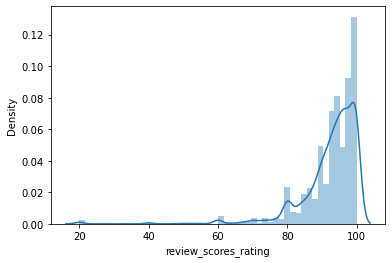

In [64]:
sns.distplot(df_text.review_scores_rating);

In [65]:
df_text = df_text[df_text['review_scores_rating']>=80]

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


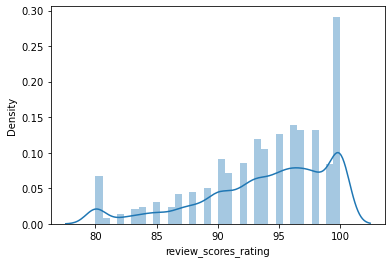

In [66]:
sns.distplot(df_text.review_scores_rating);

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


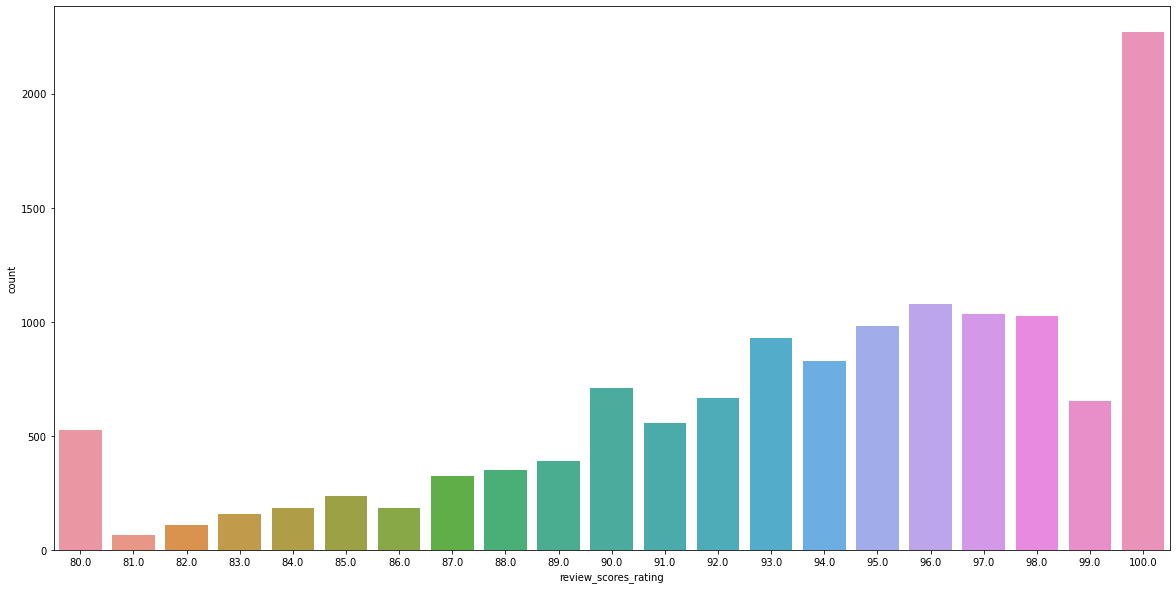

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(df_text.review_scores_rating);

In [68]:
def cambio(x):
    if x <= 85:
        x = 1
    if 85 < x <= 90:
        x = 2
    if 90 < x <= 95:
        x = 3
    if x > 95:
        x = 4
    return x

####################
df_text["rating_labeled"] = df_text["review_scores_rating"].apply(cambio)

In [69]:
df_text.rating_labeled.value_counts()

4    6058
3    3957
2    1958
1    1276
Name: rating_labeled, dtype: int64

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


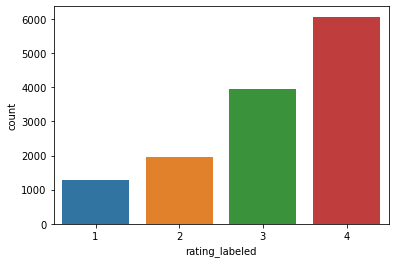

In [70]:
sns.countplot(df_text.rating_labeled);

In [71]:
df_text.head()

,id,name,summary,space,description,host_id,review_scores_rating,room_type,neighbourhood_cleansed,rating_labeled
0,6369,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,13660,98.0,Private room,Hispanoamérica,4
1,342557,Berlin's Park at your window. Parking included.,Very nice room in an area with excellent commu...,"Private room in a relaxing flat, ten minutes w...",Very nice room in an area with excellent commu...,1738288,97.0,Private room,Ciudad Jardín,4
2,413240,An oasis in the city of Madrid,My house is a peaceful town house located in t...,If to be awaken every morning by the birds of ...,If to be awaken every morning by the birds of ...,2056009,98.0,Private room,Hispanoamérica,4
3,1395084,Room for two w/ bathroom/ Bernabéu,Renting light and spacious room (15m2/161sq ft...,Renting light and spacious room (15m2/161sq ft...,Renting light and spacious room (15m2/161sq ft...,7539510,97.0,Private room,El Viso,4
4,1644183,Alquiler habitación individual,Es una habitación con una cama individual de 8...,Una casa con estilo. Silenciosa y alegre. Llen...,Es una habitación con una cama individual de 8...,1766434,99.0,Private room,Prosperidad,4


In [72]:
df_text.shape

(13249, 10)

**Hacemos un merge en df_reviews para agregar la columna rating_labeled a dicho dataframe**

In [73]:
df_tomerge=df_text[['id',"rating_labeled","room_type","neighbourhood_cleansed"]]

In [74]:
df_tomerge.columns = ["listing_id","rating_labeled","room_type","neighbourhood_cleansed"]

In [75]:
df_reviews=pd.merge(df_reviews,df_tomerge, on="listing_id")
df_reviews.groupby('rating_labeled').size()

rating_labeled
1     49733
2    114921
3    297192
4    299229
dtype: int64

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


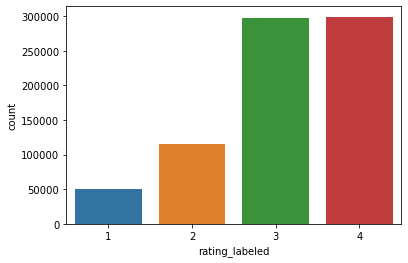

In [76]:
sns.countplot(df_reviews.rating_labeled);

In [77]:
df_reviews.shape

(761075, 6)

In [78]:
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
to_code=['neighbourhood_cleansed','room_type']
for i in to_code:
    df_reviews[i] = class_labelEncoding.fit_transform(df_reviews[i].values)

In [79]:
df_reviews.head()

,listing_id,reviewer_id,comments,rating_labeled,room_type,neighbourhood_cleansed
0,6369,84790,Simon and Arturo have the ultimate location in...,4,2,58
1,6369,84338,Myself and Kristy originally planned on stayin...,4,2,58
2,6369,98655,We had a great time at Arturo and Simon's ! A ...,4,2,58
3,6369,109871,I very much enjoyed the stay. \r\nIt's a wond...,4,2,58
4,6369,98901,Arturo and Simon are polite and friendly hosts...,4,2,58


**Tokenización**

In [80]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmat = WordNetLemmatizer()

def tokenizer(text):
    return nltk.word_tokenize(text)

def tokenizer_lemmat(text):
    return [lemmat.lemmatize(word) for word in tokenizer(text)]

In [81]:
def in_english(x):
    english_words=['he','she','it','you','we','they','the','that','home','house','good','bad','right','and']
    tokens=tokenizer(x)
    text2=[]
    for w in tokens:
        if w in english_words:
            text2.append('english')
    return text2

In [82]:
def stop_words(comment):
    stop = nltk.corpus.stopwords.words("english")
    text2=[]
    tokens=tokenizer(comment)
    for w in tokens:
        if w not in stop:
            text2.append(w)
    return text2

In [83]:
df_reviews.shape

(761075, 6)

In [84]:
df_reviews = df_reviews.dropna()
df_reviews=df_reviews.sample(frac = 1/2).reset_index(drop=True)

In [85]:
df_reviews.head()

,listing_id,reviewer_id,comments,rating_labeled,room_type,neighbourhood_cleansed
0,398450,14482411,Nurias apartment is perfectly placed in a grea...,3,0,115
1,13384154,241317733,"El apartamento está muy bien situado, pero es ...",1,2,115
2,5735879,4524331,Excelente en todo sentido y Victor un gran anf...,4,0,105
3,5717576,82162533,Great location.,2,0,115
4,28294427,77272079,"El departamento es pequeño, pero muy bien dist...",2,0,112


In [86]:
df_reviews.rating_labeled.value_counts()

4    149550
3    148518
2     57500
1     24788
Name: rating_labeled, dtype: int64

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


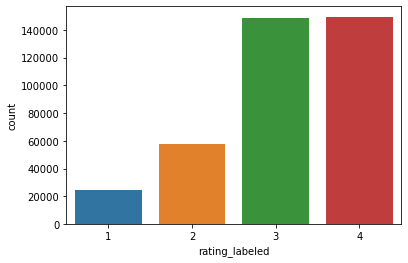

In [87]:
sns.countplot(df_reviews.rating_labeled);

In [88]:
df_reviews['comments_en']=df_reviews['comments']
df_reviews['comments_en']=df_reviews['comments_en'].apply(in_english)
df_reviews['comments_en'] = df_reviews['comments_en'].apply(' '.join)
df_reviews=df_reviews[df_reviews['comments_en']!='']
df_reviews=df_reviews.drop('comments_en',axis=1).reset_index(drop=True)
df_reviews["comments"] = df_reviews["comments"].apply(stop_words)
df_reviews['comments'] = df_reviews['comments'].apply(' '.join)
df_reviews['comments'] = df_reviews['comments'].apply(tokenizer_lemmat)
df_reviews['comments'] = df_reviews['comments'].apply(' '.join)
df_reviews.head()

,listing_id,reviewer_id,comments,rating_labeled,room_type,neighbourhood_cleansed
0,398450,14482411,Nurias apartment perfectly placed great area M...,3,0,115
1,28530059,6824791,This fabulous place explore Madrid ! This full...,3,0,96
2,6432904,118711920,"Like alot , apartment perfect two . Everything...",4,0,114
3,21390488,32548642,La latina really perfect neigbourhood stay Mad...,4,0,49
4,28419615,19829932,Excellent location heart Madrid . Everything w...,1,0,39


In [89]:
df_reviews.to_csv('df_reviews.csv',index=False)

In [90]:
df_reviews = pd.read_csv('df_reviews.csv')

In [91]:
df_reviews.head()

,listing_id,reviewer_id,comments,rating_labeled,room_type,neighbourhood_cleansed
0,398450,14482411,Nurias apartment perfectly placed great area M...,3,0,115
1,28530059,6824791,This fabulous place explore Madrid ! This full...,3,0,96
2,6432904,118711920,"Like alot , apartment perfect two . Everything...",4,0,114
3,21390488,32548642,La latina really perfect neigbourhood stay Mad...,4,0,49
4,28419615,19829932,Excellent location heart Madrid . Everything w...,1,0,39


# **MACHINE LEARNING**

**TfidVectorizer**

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=0.05,stop_words="english",strip_accents='unicode')
X = tfidf.fit_transform(df_reviews.comments)
df_model = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names())
to_drop=['listing_id', 'reviewer_id',"comments",'room_type','neighbourhood_cleansed']
df_num=df_reviews.drop(to_drop,axis=1)
df_model = pd.concat([df_num, df_model], axis = 1)

In [93]:
df_model.shape

(166179, 83)

In [94]:
df_model.head()

,rating_labeled,airbnb,amazing,apartment,area,away,bar,bathroom,beautiful,bed,best,center,central,check,city,clean,close,comfortable,communication,day,definitely,distance,easy,enjoyed,excellent,experience,fantastic,flat,friendly,good,great,great host,great location,helpful,highly,highly recommend,home,host,kind,kitchen,like,little,located,location,lot,loved,lovely,madrid,metro,metro station,minute,near,need,needed,neighborhood,nice,night,people,perfect,place,plaza,quiet,really,recommend,restaurant,right,room,small,space,spacious,station,stay,stayed,staying,street,super,thank,thanks,time,walk,walking,walking distance,wonderful
0,3,0.0,0.0,0.176475,0.49862,0.0,0.17555,0.000000,0.0,0.0,0.184659,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.381251,0.000000,0.0,0.0,0.0,0.0,0.000000,0.268686,0.0,0.0,0.150092,0.0,0.0,0.0,0.110056,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.170998,0.0,0.0,0.303607,0.0,0.0,0.000000,0.0,0.157691,0.0,0.0,0.0,0.329155,0.0,0.132478,0.000000,0.0,0.000000,0.000000,0.000000,0.147980,0.000000,0.0,0.176841,0.0,0.0,0.0,0.201763,0.0,0.000000,0.0,0.0,0.0,0.192553,0.000000,0.000000,0.0,0.0,0.0
1,3,0.0,0.0,0.138200,0.00000,0.0,0.00000,0.289928,0.0,0.0,0.000000,0.0,0.0,0.254931,0.0,0.161972,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.140275,0.0,0.0,0.000000,0.0,0.0,0.0,0.172374,0.0,0.290056,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.317013,0.0,0.0,0.270472,0.0,0.246980,0.0,0.0,0.0,0.000000,0.0,0.000000,0.150425,0.0,0.000000,0.000000,0.194504,0.000000,0.282767,0.0,0.000000,0.0,0.0,0.0,0.316008,0.0,0.292713,0.0,0.0,0.0,0.000000,0.233079,0.239082,0.0,0.0,0.0
2,4,0.0,0.0,0.546669,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.542337,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.488481,0.0,0.0,0.0,0.000000,0.0,0.410378,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,4,0.0,0.0,0.000000,0.00000,0.0,0.33972,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.200126,0.26287,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.253652,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.330911,0.0,0.0,0.195844,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.512734,0.000000,0.0,0.320595,0.278295,0.000000,0.286368,0.000000,0.0,0.000000,0.0,0.0,0.0,0.195223,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,1,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.611956,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.518726,0.0,0.0,0.0,0.380361,0.0,0.000000,0.000000,0.0,0.0,0.299044,0.000000,0.0,0.0,0.349760,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


**CLASIFICACIÓN**

**Separamos dataframe en train y test**

In [95]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.asarray(df_model.drop(['rating_labeled'],axis=1))
y = np.asarray(df_model.rating_labeled)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116325, 82) (116325,)
Test set: (49854, 82) (49854,)


**Balanceamos las clases de la variable y_train**

In [96]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(n_jobs=-1)
X_train, y_train = smt.fit_resample(X_train, y_train)

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


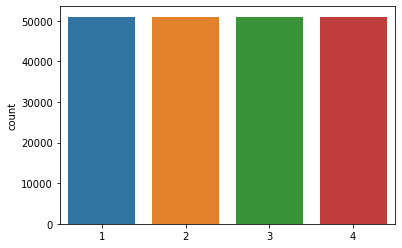

In [97]:
sns.countplot(y_train);

In [98]:
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (203932, 82) (203932,)


**Cat Boost**

In [99]:
from catboost import CatBoostClassifier

clf6 = CatBoostClassifier()
clf6.fit(X_train, y_train,logging_level="Silent")
clf6.score(X_train,y_train)

0.5909862110899712

In [100]:
clf6.score(X_test,y_test)

0.43224214706944275

**Métricas de validación**

In [101]:
y_pred = clf6.predict(X_test)

In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('')
print('Matriz de Confusión\n',metrics.confusion_matrix(y_test, y_pred))
print('')
target_names = ['class 1', 'class 2','class 3','class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy : 0.43224214706944275

Matriz de Confusión
 [[  436   328   963   662]
 [  859   735  2662  2164]
 [ 1691  1633  7240  8662]
 [ 1243  1287  6151 13138]]

              precision    recall  f1-score   support

     class 1       0.10      0.18      0.13      2389
     class 2       0.18      0.11      0.14      6420
     class 3       0.43      0.38      0.40     19226
     class 4       0.53      0.60      0.57     21819

    accuracy                           0.43     49854
   macro avg       0.31      0.32      0.31     49854
weighted avg       0.43      0.43      0.43     49854

